# ETHEREUM FRAUD DETECTION

To predict weather the transaction is fraudulent or not-fraudulent using the transaction data.

In [58]:
# Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Dataset link : https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

In [59]:
df = pd.read_csv('transaction_dataset.csv')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# BASIC EDA

In [60]:
df.shape

(9841, 51)

In [61]:
df.columns


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [62]:
df.drop(['Unnamed: 0', 'Index', 'Address'],axis=1,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [64]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [65]:
df.nunique()

FLAG                                                       2
Avg min between sent tnx                                5013
Avg min between received tnx                            6223
Time Diff between first and last (Mins)                 7810
Sent tnx                                                 641
Received Tnx                                             727
Number of Created Contracts                               20
Unique Received From Addresses                           256
Unique Sent To Addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent                                            6647
avg val sent                                            5854
min value sent to contract                                 3
max val sent to contract

In [66]:
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

# Correlation Matrix

In [67]:
df.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,4.291143e-03,0.008843,-0.001557,-0.001019,-0.001415,NaN,NaN,NaN,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,...,1.537920e-02,0.019126,-0.001899,-0.000744,-0.000918,NaN,NaN,NaN,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,9.202945e-04,0.002052,-0.000092,0.000149,-0.000070,NaN,NaN,NaN,0.006033,0.030089
Unique Received From Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,...,1.603025e-03,0.003592,-0.001044,-0.000261,-0.000546,NaN,NaN,NaN,0.040674,0.148851
Unique Sent To Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,...,3.598439e-03,0.005246,-0.000967,-0.000439,-0.000827,NaN,NaN,NaN,0.084897,0.237520
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,...,-1.670077e-03,-0.002852,-0.001498,-0.001529,-0.001477,NaN,NaN,NaN,-0.028810,-0.002695


<AxesSubplot:>

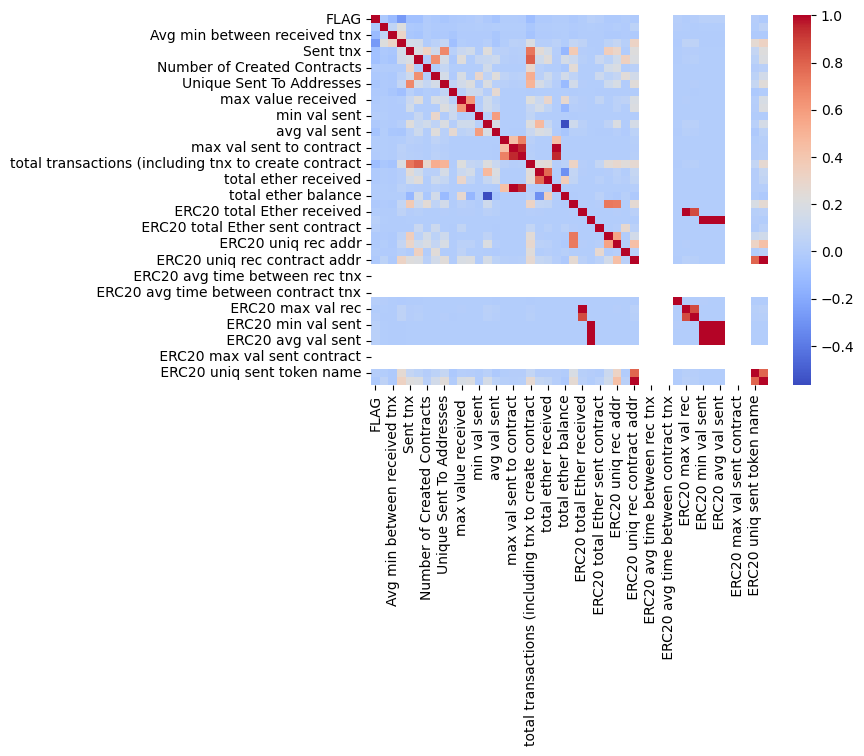

In [68]:
sns.heatmap(df.corr(),cmap='coolwarm')

# CHECKING IF DATASET IS SKEWED OR NOT

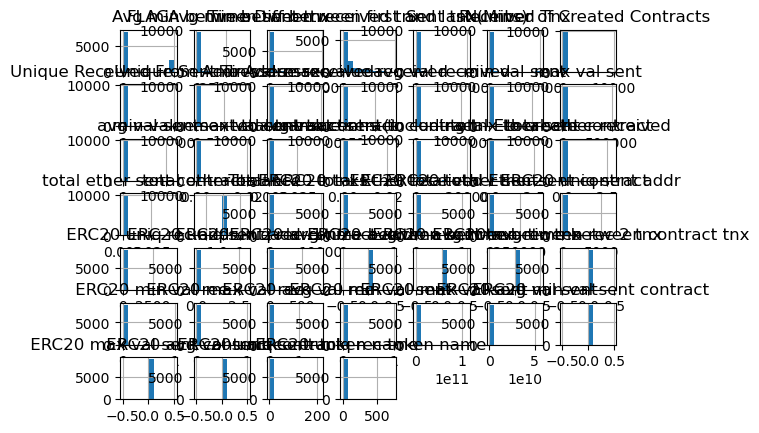

In [69]:
hist = df.hist(bins=10)

In [70]:
# checking skewness of dataset

df.skew(axis = 0, skipna = True)

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

After checking skewness of dataset and from histogram we can see that the dataset is heavily skewed, with most of the weight being on the left tail.

# CHECKING IF DATASET IS BALANCED OR NOT

<AxesSubplot:xlabel='FLAG', ylabel='count'>

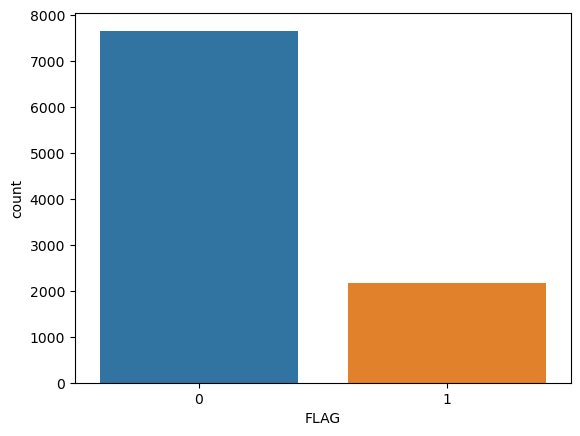

In [71]:

sns.countplot(x ='FLAG', data = df)

In [72]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

0    7662
1    2179
Name: FLAG, dtype: int64


Text(0.5, 1.0, 'Target distribution')

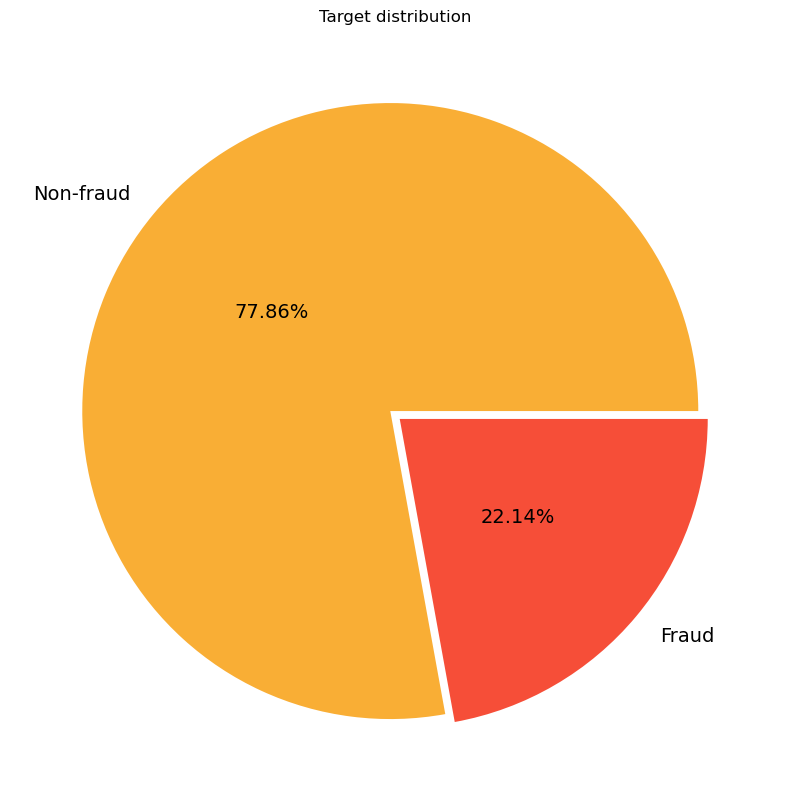

In [73]:
# Inspect target distribution

print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')


The dataset is heavily imbalanced with only 22% of fraudulent instance.

# Data cleaning

<AxesSubplot:>

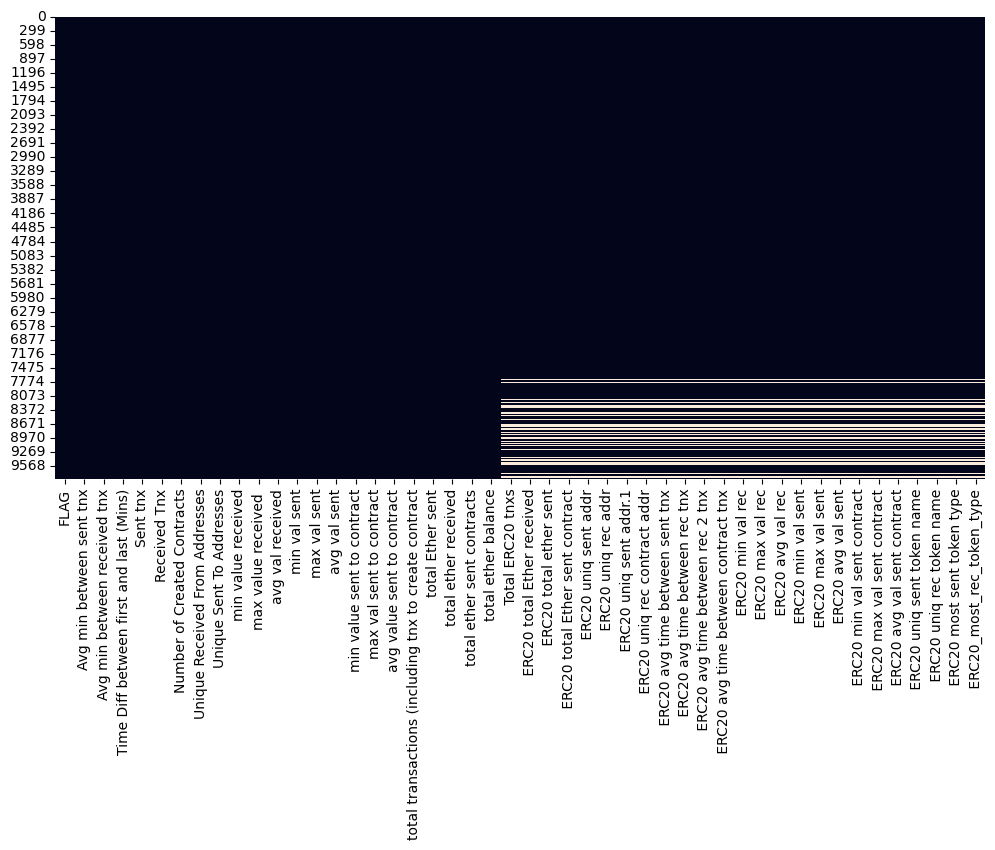

In [74]:
# missings pattern of the dataframe

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)


In [75]:
#  categorical columns

categories = df.select_dtypes('O')
categories.nunique()

 ERC20 most sent token type    305
 ERC20_most_rec_token_type     467
dtype: int64

In [76]:
# droping categorical columns
df.drop([' ERC20 most sent token type',' ERC20_most_rec_token_type'], axis=1, inplace=True)

Most of the tockens occur only once so they are irrelevant in fraud detection. So droped them.

In [77]:
# Replacing missings of numerical variables with median
df.fillna(df.median(), inplace=True)

<AxesSubplot:>

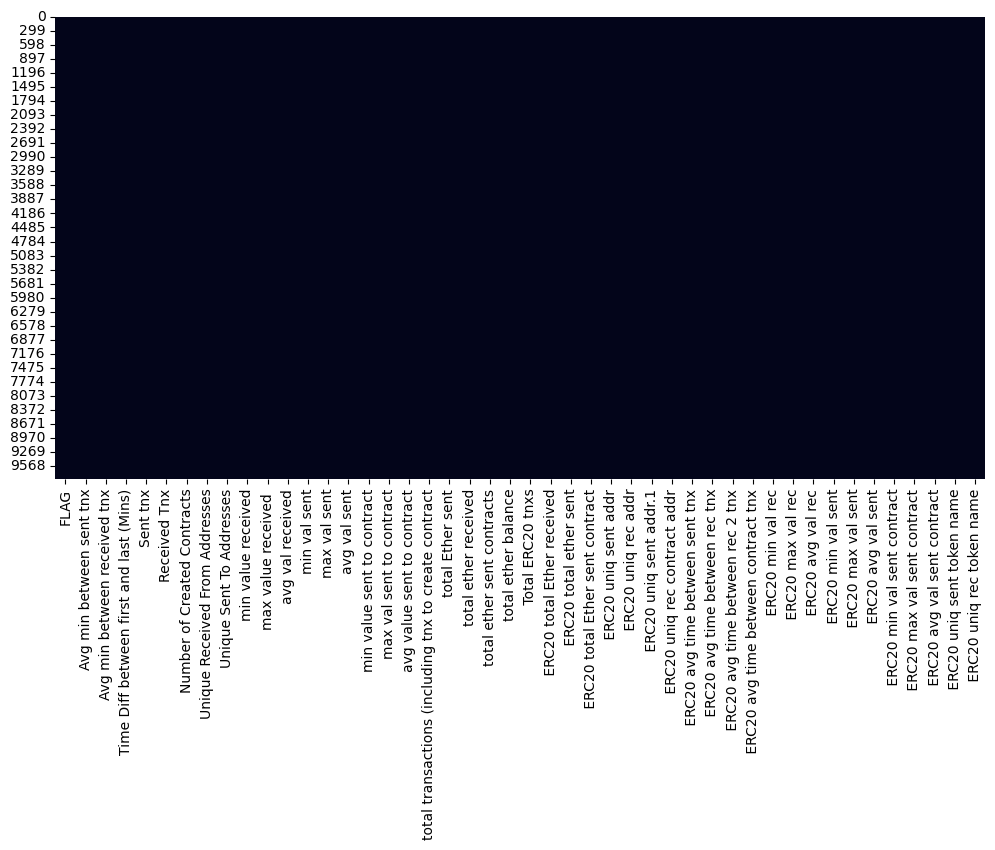

In [78]:


plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)


In [79]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])


 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


In [80]:
# Droping features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [81]:
df.shape

(9841, 39)

In [82]:

corr_mat = df.corr(method='pearson')
  

upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  

unique_corr_pairs = upper_corr_mat.unstack().dropna()
  

sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

pd.options.display.max_rows = 4000

total ether balance                                   max val sent                                           -0.564872
                                                      total Ether sent                                       -0.313816
Time Diff between first and last (Mins)               FLAG                                                   -0.269354
total ether balance                                   avg val received                                       -0.135682
                                                      Sent tnx                                               -0.127211
Avg min between received tnx                          FLAG                                                   -0.118533
total ether balance                                   Unique Sent To Addresses                               -0.113428
total transactions (including tnx to create contract  FLAG                                                   -0.100289
min value received                              

In [83]:
# droping one of the highly correlated features (corr > 0.7)

drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

<AxesSubplot:>

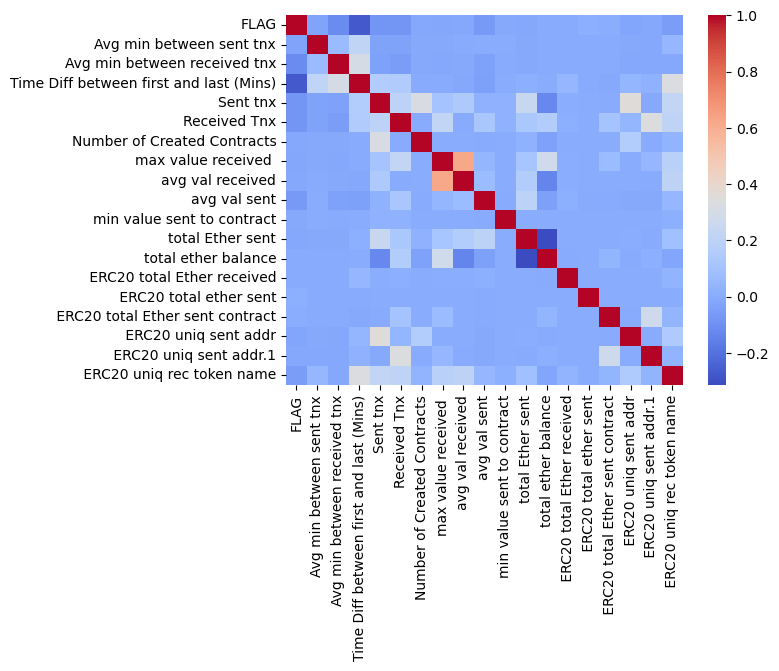

In [84]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   max value received                       9841 non-null   float64
 8   avg val received                         9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  min value sent to contract               9841 no

In [86]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of  ERC20 uniq rec token name')

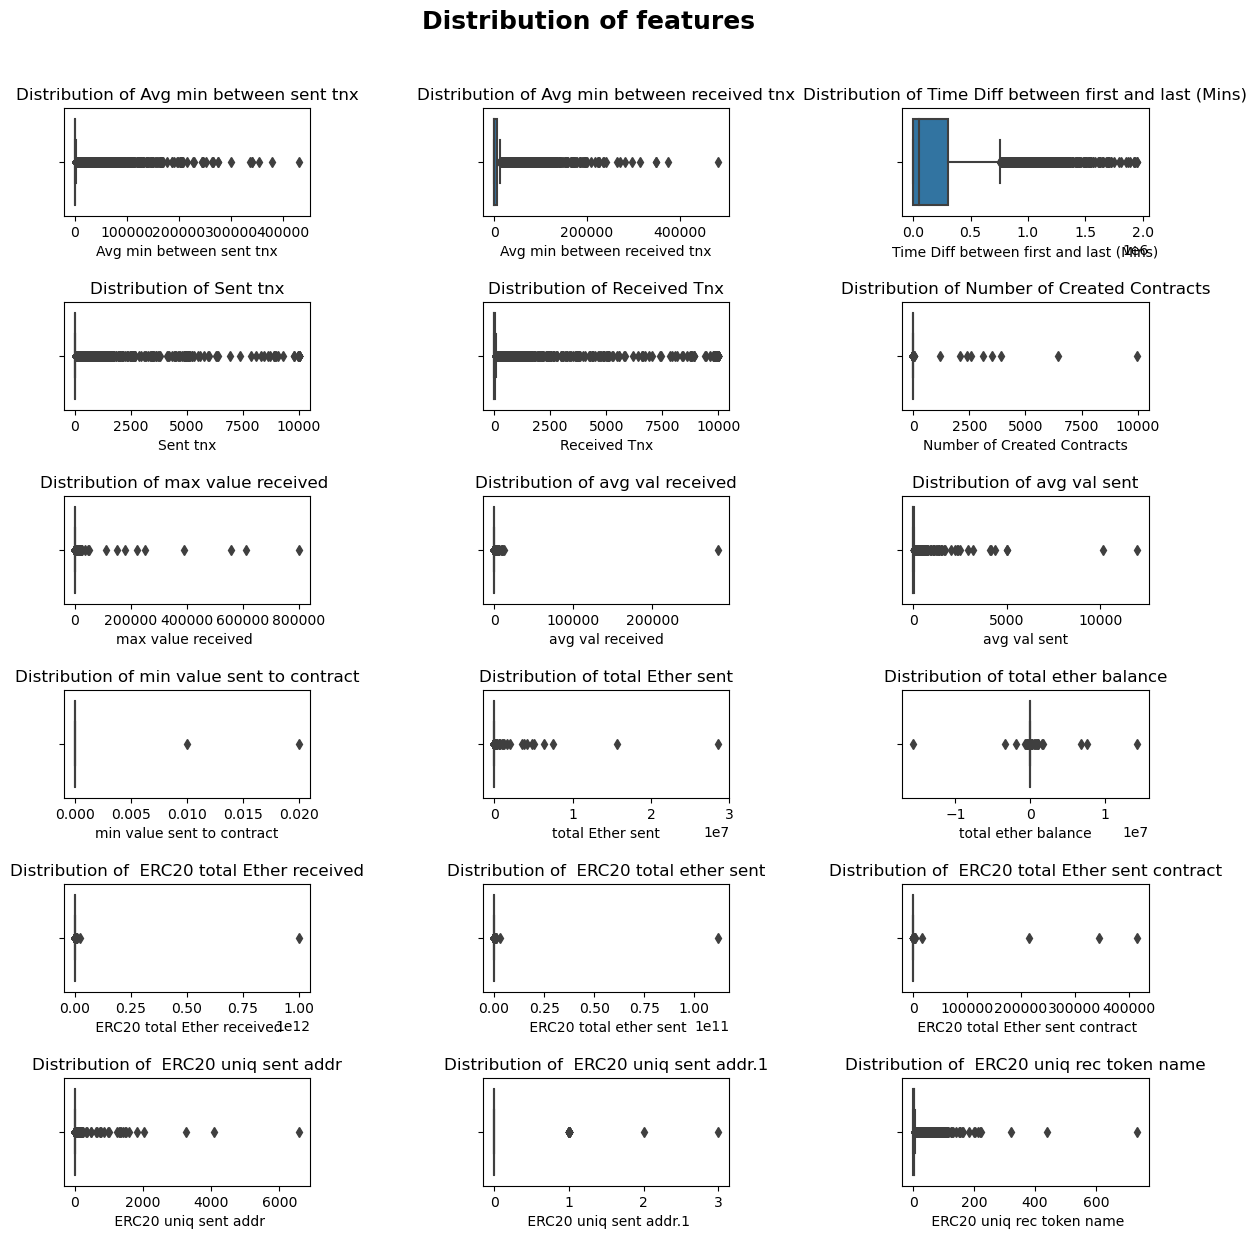

In [87]:
# distribution of features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

In [88]:
print(df['min value sent to contract'].value_counts())
print(df[' ERC20 uniq sent addr.1'].value_counts())

0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


It can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [89]:
df.drop(['min value sent to contract', ' ERC20 uniq sent addr.1'],axis=1,inplace=True)

In [90]:
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


# DATA PREPROCESSING

In [91]:
X = df.drop(['FLAG'],axis=1)
y= df['FLAG']


In [92]:
# Spliting into training (80%) and testing set (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


# HANDLING SKEWNESS

In [93]:
# Normalize the training features
from sklearn.preprocessing import PowerTransformer
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)
norm_test_f = norm.transform(X_test)

In [94]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,1.294061,1.151313,1.393751,1.591951,1.017881,-0.401539,1.170696,0.988757,0.651223,1.416308,-0.007274,1.815951,2.508169,-0.038483,2.398649,1.831406
1,-1.096066,-1.184221,-1.638410,-1.391726,-1.785005,-0.401539,-1.407378,-1.283886,-1.138468,-1.252291,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,0.226082
2,-0.006354,0.213137,1.103220,1.970707,1.876994,-0.401539,0.613575,-0.995919,-0.869934,1.171479,-0.006819,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
3,-1.096066,1.220438,0.195684,-1.391726,-0.618856,2.490307,-0.871196,-0.822389,-1.138468,-1.252291,-0.006832,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
4,0.628503,-1.121221,-0.904665,-0.206187,-0.618856,-0.401539,0.889875,1.277099,1.332663,0.787323,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-1.096066,0.249518,-0.705997,-0.590325,-0.618856,-0.401539,-0.535113,-0.269750,0.183532,-0.463079,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,0.226082
7868,1.128623,0.633621,0.895636,0.707356,1.432439,-0.401539,0.339924,-0.354586,1.043745,1.010645,-0.006835,1.611838,-0.410600,-0.038483,-0.437145,1.238838
7869,-1.096066,-1.184221,-1.154101,-0.590325,-1.004903,-0.401539,-1.275895,-1.091970,-0.960939,-1.159157,-0.006835,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
7870,1.385084,0.988959,0.715180,0.707356,0.556810,-0.401539,1.858790,1.531808,1.671553,1.592460,-0.006835,1.514388,-0.410600,-0.038483,-0.437145,1.122262


# HANDLING IMBALANCE

In [95]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(norm_train_f, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 1757
Before OverSampling, counts of label '0': 6115 

After OverSampling, counts of label '1': 6115
After OverSampling, counts of label '0': 6115


<AxesSubplot:xlabel='FLAG', ylabel='count'>

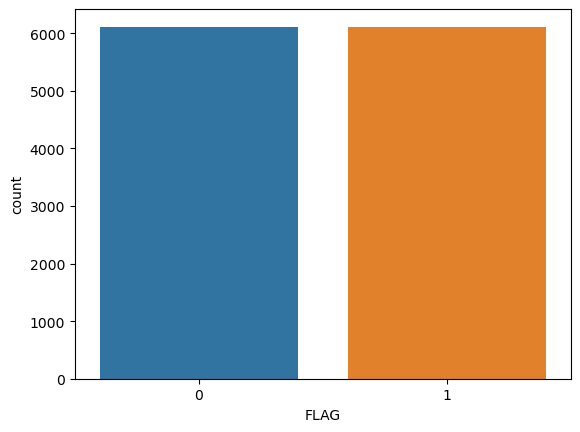

In [96]:
sns.countplot(y_train_res)

# MODELING

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix

In [98]:

LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)

preds = LR.predict(norm_test_f)

In [99]:
print(y_test.shape)
y_test.value_counts()

(1969,)


0    1547
1     422
Name: FLAG, dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1547
           1       0.68      0.88      0.77       422

    accuracy                           0.88      1969
   macro avg       0.82      0.88      0.84      1969
weighted avg       0.90      0.88      0.89      1969

[[1369  178]
 [  50  372]]


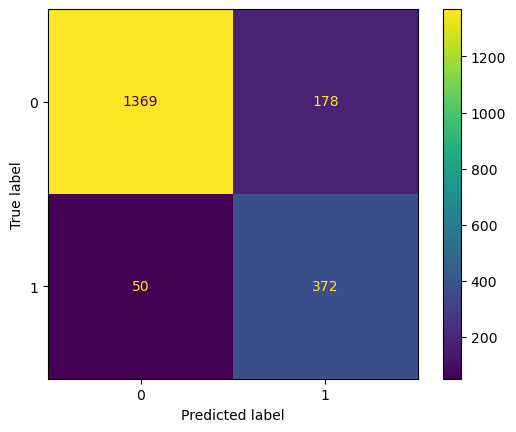

In [100]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
plot_confusion_matrix(LR, norm_test_f, y_test)

# Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1547
           1       0.88      0.93      0.90       422

    accuracy                           0.96      1969
   macro avg       0.93      0.95      0.94      1969
weighted avg       0.96      0.96      0.96      1969

[[1491   56]
 [  29  393]]


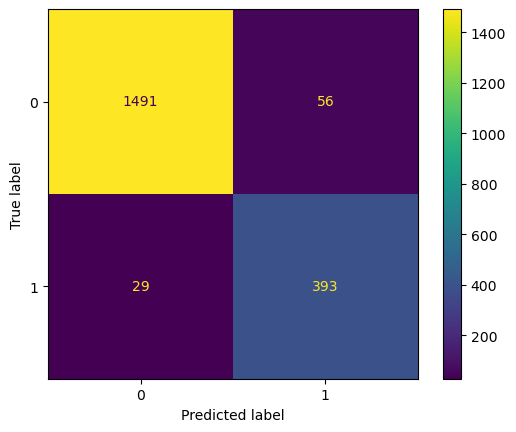

In [101]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train_res, y_train_res)
preds_DT = DT.predict(norm_test_f)

print(classification_report(y_test, preds_DT))
print(confusion_matrix(y_test, preds_DT))
plot_confusion_matrix(DT, norm_test_f, y_test)

# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.92      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.95      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1513   34]
 [  20  402]]


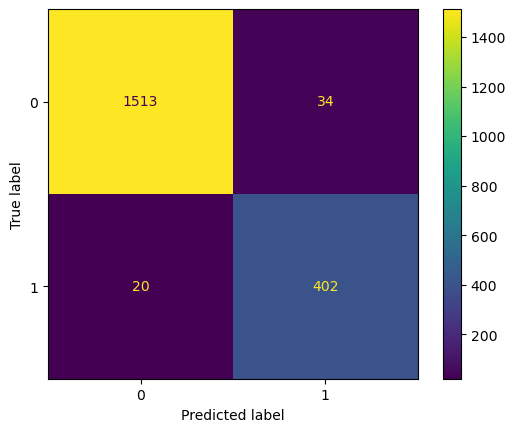

In [103]:
RF = RandomForestClassifier()
RF.fit(X_train_res, y_train_res)
preds_RF = RF.predict(norm_test_f)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))
plot_confusion_matrix(RF, norm_test_f, y_test)

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1547
           1       0.86      0.96      0.91       422

    accuracy                           0.96      1969
   macro avg       0.92      0.96      0.94      1969
weighted avg       0.96      0.96      0.96      1969

[[1480   67]
 [  15  407]]


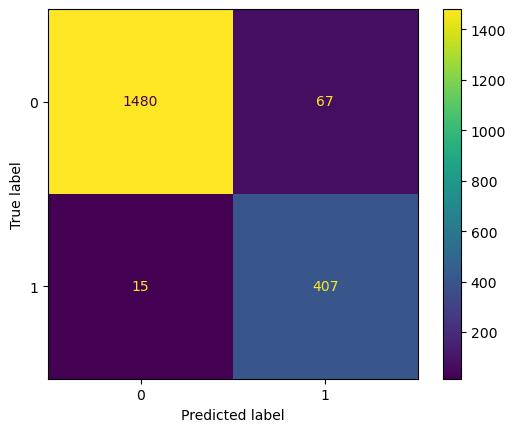

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_train_res, y_train_res)
preds_GB = GB.predict(norm_test_f)

print(classification_report(y_test, preds_GB))
print(confusion_matrix(y_test, preds_GB))
plot_confusion_matrix(GB, norm_test_f, y_test)

# XGB Classifier

In [105]:
import xgboost as xgb

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1521   26]
 [  18  404]]


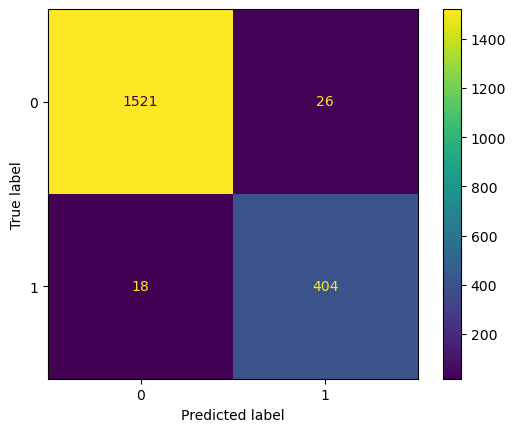

In [106]:
xgb_c = xgb.XGBClassifier()
xgb_c.fit(X_train_res, y_train_res)
preds_xgb = xgb_c.predict(norm_test_f)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))
plot_confusion_matrix(xgb_c, norm_test_f, y_test)

# Hyper parameter tunning

In [107]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train_res, y_train_res,param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    random = RandomizedSearchCV(model,param_grid,scoring='recall',n_iter=10,cv=5,verbose=2,n_jobs=-1)
   
    random.fit(X_train_res, y_train_res)
    print("\n Best parameters: ",random.best_params_)

Hyperparameters tuning for RF Classifier

In [108]:
%%time

rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 400, num = 50)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 9, num = 3)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train_res, y_train_res,rf_para_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best parameters:  {'n_estimators': 244, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 9, 'bootstrap': False}
CPU times: total: 21.7 s
Wall time: 2min


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1547
           1       0.88      0.96      0.92       422

    accuracy                           0.96      1969
   macro avg       0.94      0.96      0.95      1969
weighted avg       0.97      0.96      0.96      1969

[[1493   54]
 [  18  404]]
CPU times: total: 25.8 s
Wall time: 27.9 s


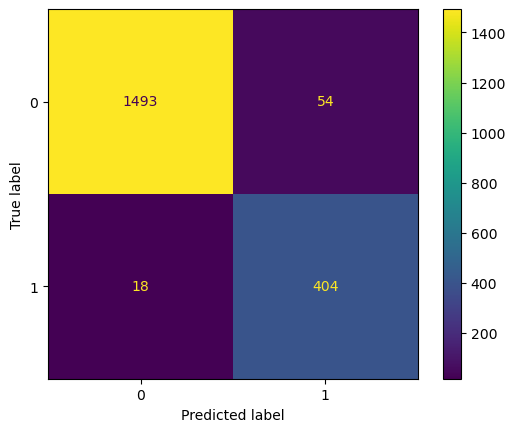

In [109]:
%%time
rf= RandomForestClassifier(**{'n_estimators': 277, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': False})
rf.fit(X_train_res, y_train_res)
preds_rf = rf.predict(norm_test_f)

print(classification_report(y_test, preds_rf))
print(confusion_matrix(y_test, preds_rf))
plot_confusion_matrix(rf, norm_test_f, y_test)

Hyperparameters tuning for Gradient Boosting Classifier

In [110]:
%%time
# create parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [x for x in range(200,500, 50)], 
 'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [x for x in range(5,17, 3)], 
 'min_samples_split': [x for x in range(2,10)]
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingClassifier(),X_train_res, y_train_res,GBR_para_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best parameters:  {'n_estimators': 300, 'min_samples_split': 4, 'max_depth': 11, 'learning_rate': 0.3}
CPU times: total: 48.4 s
Wall time: 5min 12s


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1522   25]
 [  16  406]]


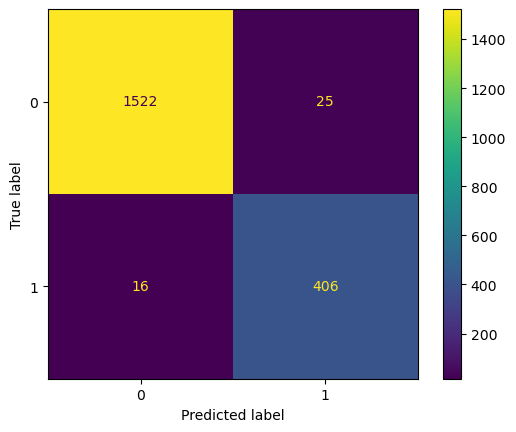

In [111]:
GB = GradientBoostingClassifier(**{'n_estimators': 450, 'min_samples_split': 4, 'max_depth': 11, 'learning_rate': 0.3})
GB.fit(X_train_res, y_train_res)
preds_GB = GB.predict(norm_test_f)

print(classification_report(y_test, preds_GB))
print(confusion_matrix(y_test, preds_GB))
plot_confusion_matrix(GB, norm_test_f, y_test)

Hyperparameters tuning for XGB Classifier

In [112]:
%%time
# create parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(xgb.XGBClassifier(),X_train_res, y_train_res,XGB_para_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best parameters:  {'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.4}
CPU times: total: 11.9 s
Wall time: 31 s


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1523   24]
 [  16  406]]


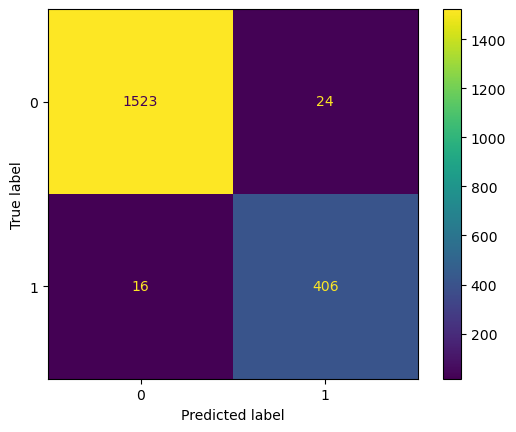

In [113]:
xgb_c = xgb.XGBClassifier(** {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.5})
xgb_c.fit(X_train_res, y_train_res)
preds_xgb = xgb_c.predict(norm_test_f)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))
plot_confusion_matrix(xgb_c, norm_test_f, y_test)

# CONCLUSION

We did training and prediction using all the above models and selected XGB Classifier as final model as it performed well compard to other models with highest recall and acurracy of 98%.

We have performed EDA, preprocessing, build different models, visualized feature importance, hyper parameter tunning and did prediction.

We also perform necessary operations to handle imbalanced and skewed nature of data.